<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Capstone Project/data_cardiovascular_risk.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
# visualize the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.drop('id', axis = 1, inplace = True)

In [6]:
df.shape

(3390, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [8]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
# statistical analysis of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


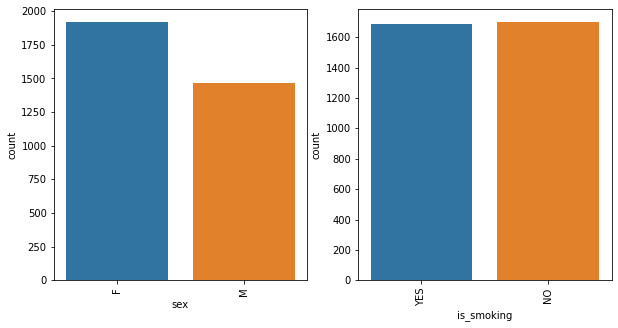

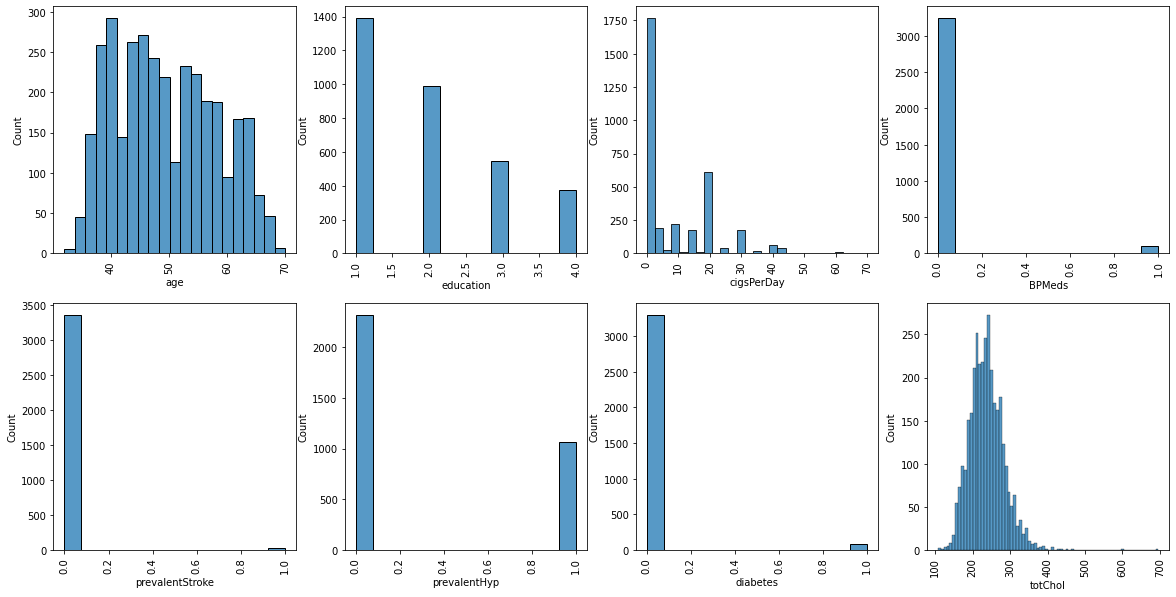

In [10]:
# Plotting categorical and numerical columns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical=[]
for column in df:
    if is_string_dtype(df[column]):
        categorical.append(column)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

numerical=[]
for column in df:
    if is_numeric_dtype(df[column]):
        numerical.append(column)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [11]:
# the categorical column 'is_smoking' has values 'YES' and 'NO' and are mapped to 1 and 0 respectively
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})
df['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [12]:
# the 'sex' column is dummified.
df = pd.get_dummies(df)
df.head()

,age,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1,0
1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1
2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0


In [13]:
y = df['diabetes'].value_counts()
colors = ['#0000EE', '#FFD700']

trace = go.Pie(labels=y.index,values=y,textinfo='value',
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(title = 'Proportion of people diabetic vs non-diabetic',width=500,height=500)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

In [14]:
# declaring independent and dependent columns
X_ind = df.drop('diabetes', axis = 1)
Y_dep = df['diabetes']

In [15]:
# applying iterative imputer to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X_ind = imp.fit_transform(X_ind)

[IterativeImputer] Completing matrix with shape (3390, 16)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.05
[IterativeImputer] Change: 37.53778943184662, scaled tolerance: 0.6960000000000001 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.10
[IterativeImputer] Change: 0.31539927613575003, scaled tolerance: 0.6960000000000001 
[IterativeImputer] Early stopping criterion reached.


In [16]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_ind, Y_dep, test_size = 0.2, random_state = 3)

In [17]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts(normalize = True))

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts(normalize = True))

Distribution of classes of dependent variable in train :
0    0.975664
1    0.024336
Name: diabetes, dtype: float64

 Distribution of classes of dependent variable in test :
0    0.969027
1    0.030973
Name: diabetes, dtype: float64


In [18]:
# standardized the X_train and X_test separately
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

### KNearestNeighbor Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train_norm, Y_train)

KNeighborsClassifier()

In [20]:
y_pred = knnclassifier.predict(X_test_norm)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print('Accuracy Score of the KNN classifier:',accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Accuracy Score of the KNN classifier: 0.9749262536873157
[[657   0]
 [ 17   4]]


In [22]:
cm = classification_report(Y_test, y_pred)
print('Classification Report:\n', cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       657
           1       1.00      0.19      0.32        21

    accuracy                           0.97       678
   macro avg       0.99      0.60      0.65       678
weighted avg       0.98      0.97      0.97       678



- Precision for the class - 1 is 0.93 that is a subject is not diabetic but the model is predicting otherwise.
- The train and test set are highly imbalanced. Approximately 97% are of class - 0 (Non-Diabetic) and 3% are of class - 1(Diabetic) 
- It can be perceived that the Doctor will suggest the patient to redo the diabetes test to confirm the diagonosis.


### SMOTE - Making the imbalanced dataset balanced

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_ind, Y_dep)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 6606


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [25]:
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

### SupportVector Classifier

In [26]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train_norm, Y_train)

svc_predict = svc_model.predict(X_test_norm)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.9782097690615836
Accuracy score: 0.9780635400907716


In [27]:
print(confusion_matrix(Y_test, svc_predict))

[[664  18]
 [ 11 629]]


In [28]:
cm = classification_report(Y_test, svc_predict)
print('Classification Report:\n', cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       682
           1       0.97      0.98      0.98       640

    accuracy                           0.98      1322
   macro avg       0.98      0.98      0.98      1322
weighted avg       0.98      0.98      0.98      1322



- SVC is applied followed by SMOTE technique.
- Precision is improved though the recall performance depriciated.